<a href="https://colab.research.google.com/github/AnnM-J/AnnM-J/blob/main/MRI_Brainscan_Google_Colab_GSDC_UTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle API Setup and Dataset Download

In [ ]:
print("Please upload your kaggle.json file!")
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("\nDownloading the Brain MRI dataset (Small Version)...")
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

print("Unzipping dataset...")
!unzip -q brain-mri-images-for-brain-tumor-detection.zip


Please upload your kaggle.json file!


Saving kaggle.json to kaggle.json

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 1.12GB/s]
Unzipping dataset...


# Create Training, Validation, and Test Datasets

In [ ]:
import tensorflow as tf

IMG_SIZE = 224
BATCH_SIZE = 32
epochs = 10

train_dataset = tf.keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)
test_dataset = validation_dataset.take(1)
validation_dataset = validation_dataset.skip(1)



class_names = train_dataset.class_names
print("\nFound the following classes:", class_names)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.

Found the following classes: ['no', 'yes']


# Build CNN Model with Data Augmentation

In [ ]:
from tensorflow.keras import layers, models

data_augmentation = models.Sequential(
  [
    #code here
    #code here
    #code here
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)

  ]
)

model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,446,369 (24.59 MB)

 Trainable params: 6,446,369 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

# Train, Visualize, and Evaluate Model

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5304 - loss: 0.7137 - val_accuracy: 0.8889 - val_loss: 0.3763
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7909 - loss: 0.5176 - val_accuracy: 0.6667 - val_loss: 0.7170
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7365 - loss: 0.5157 - val_accuracy: 0.9444 - val_loss: 0.2820
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7057 - loss: 0.5763 - val_accuracy: 0.8333 - val_loss: 0.4247
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7215 - loss: 0.5427 - val_accuracy: 0.6667 - val_loss: 0.9409
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7697 - loss: 0.4980 - val_accuracy: 0.7222 - val_loss: 0.7222
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7685 - loss: 0.5070 - val_accuracy: 0.8889 - val_loss: 0.4178
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7736 - loss: 0.5067 - val_accuracy: 0.8333 - val_loss: 0.4802
Epoch 9/

NameError: name 'accuracy' is not defined

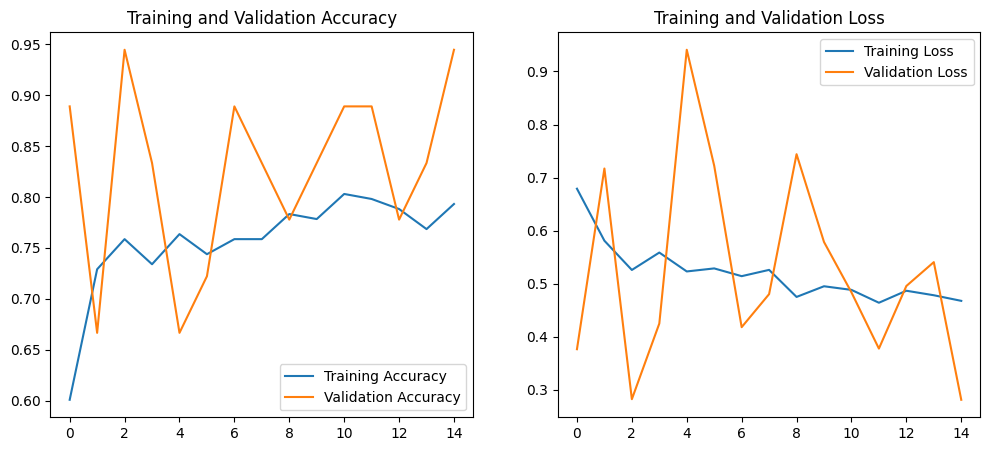

In [ ]:
#code here
epochs = 15
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

#code here
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#code here

print("\nEvaluating model on the test set...")
#code here
print(f"\n Test Accuracy: {accuracy*100:.2f}%")

# Visualize Predictions

Evaluating model on the test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step - accuracy: 0.8438 - loss: 0.4915

Test Accuracy: 84.38%
------------------------------
The model prediction if there is a tumor yes/no
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


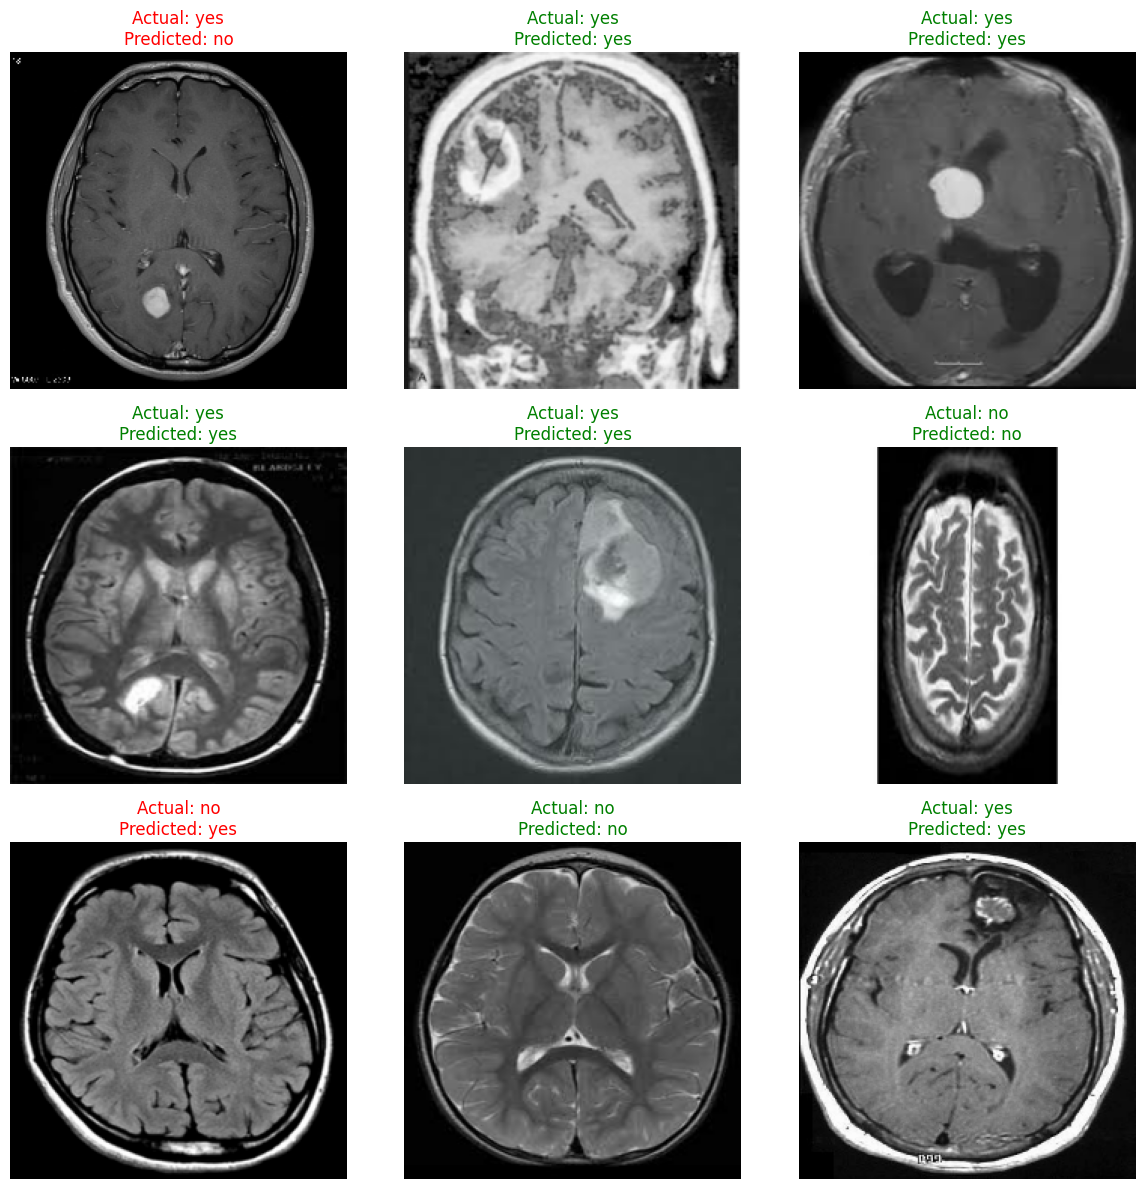

In [ ]:
print("Evaluating model on the test set...")
loss, accuracy = model.evaluate(test_dataset)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print("-" * 30)

#code here
print("The model prediction if there is a tumor yes/no")


plt.figure(figsize=(12, 12))

for images, labels in test_dataset.take(1):
  predictions = model.predict(images)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class_index = 1 if predictions[i] > 0.5 else 0
    predicted_class_name = class_names[predicted_class_index]
    actual_class_name = class_names[int(labels[i])]

    #code here
    title_color = "green" if predicted_class_name == actual_class_name else "red"
    #code here

    plt.title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}", color=title_color)
    plt.axis("off")

plt.tight_layout()
#code here
plt.show()